In [1]:
import os , zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-10-26 01:31:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.126.207, 74.125.70.207, 74.125.132.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.126.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   147MB/s    in 0.7s    

2023-10-26 01:31:01 (147 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# unzip the zip file

zip_ref = zipfile.ZipFile("/content/pizza_steak.zip","r")
zip_ref.extractall()
zip_ref.close()

In [4]:
# lets view the images randomly

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):

  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")


  print(f"image shape : {img.shape}")

  return img

image shape : (512, 512, 3)
image shape : (512, 289, 3)


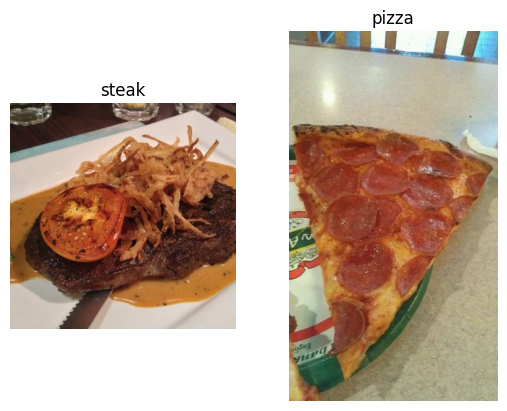

In [5]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("/content/pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("/content/pizza_steak/train/","pizza")

In [6]:
## train and test direcory

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [8]:
# turning images into batches

train_data = train_datagen.flow_from_directory(
                                      directory = train_dir,
                                      target_size = (224,224),
                                      class_mode = "binary",
                                      batch_size = 32
)

test_data = test_datagen.flow_from_directory(
                                      directory = test_dir,
                                      target_size = (224,224),
                                      class_mode = "binary",
                                      batch_size = 32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
# get the sample of training data batch

images,labels = train_data.next()

len(images),len(labels)

(32, 32)

In [10]:
labels

array([0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.],
      dtype=float32)

In [11]:
# start with creating baseline model


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [12]:
model_4 = Sequential([

          Conv2D(filters = 11,kernel_size = 3,strides = 1,padding = "valid",activation = "relu",input_shape = (224,224,3)),

          Conv2D(11,3,activation = "relu"),

          Conv2D(11,3,activation = "relu"),

          Flatten(),

          Dense(1,activation = "sigmoid")


])

model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [13]:
len(train_data),len(test_data)

(47, 16)

In [14]:
history_4 = model_4.fit(train_data,
                      epochs = 20,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data)
                      )

Epoch 1/20
47/47 [==============================] - 24s 218ms/step - loss: 0.8553 - accuracy: 0.6393 - val_loss: 0.5468 - val_accuracy: 0.7300
Epoch 2/20
47/47 [==============================] - 6s 123ms/step - loss: 0.4394 - accuracy: 0.8187 - val_loss: 0.4479 - val_accuracy: 0.7980
Epoch 3/20
47/47 [==============================] - 6s 133ms/step - loss: 0.3503 - accuracy: 0.8633 - val_loss: 0.4068 - val_accuracy: 0.8120
Epoch 4/20
47/47 [==============================] - 5s 116ms/step - loss: 0.1970 - accuracy: 0.9380 - val_loss: 0.3813 - val_accuracy: 0.8360
Epoch 5/20
47/47 [==============================] - 6s 135ms/step - loss: 0.0596 - accuracy: 0.9873 - val_loss: 0.4870 - val_accuracy: 0.8160
Epoch 6/20
47/47 [==============================] - 6s 136ms/step - loss: 0.0279 - accuracy: 0.9953 - val_loss: 0.5870 - val_accuracy: 0.8120
Epoch 7/20
47/47 [==============================] - 6s 118ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.5369 - val_accuracy: 0.8060
Epoch

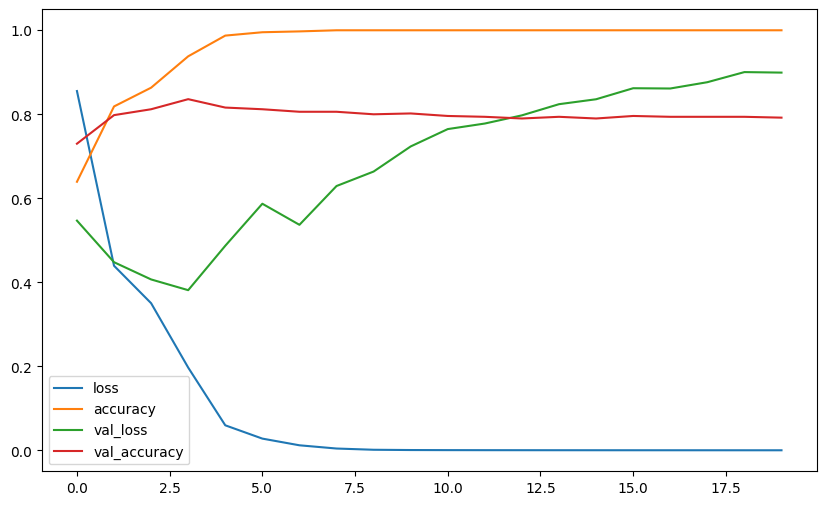

In [15]:
##plot the graph with losses and accuracy

import pandas as pd

pd.DataFrame(history_4.history).plot(figsize = (10,6));

In [16]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

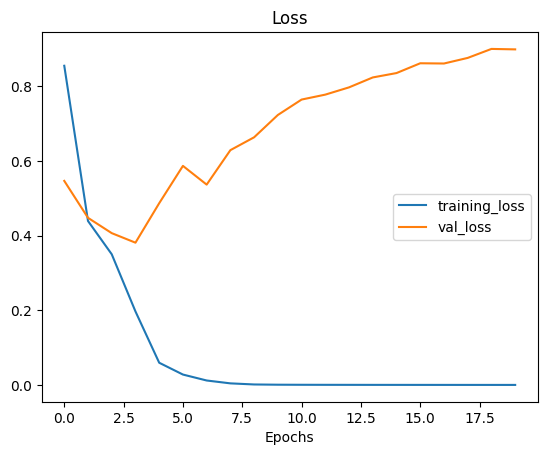

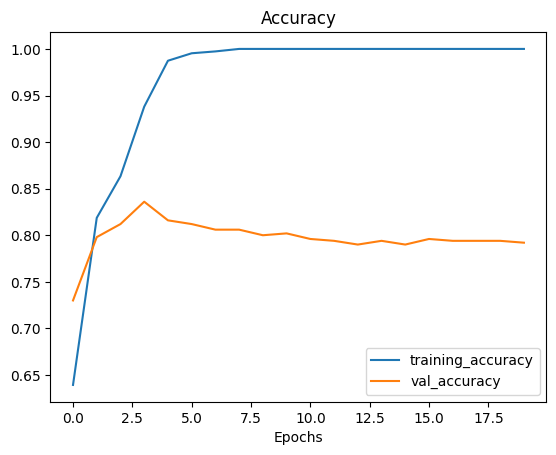

In [17]:
plot_loss_curves(history_4)

In [18]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 11)      308       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 11)      1100      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 11)      1100      
                                                                 
 flatten (Flatten)           (None, 522764)            0         
                                                                 
 dense (Dense)               (None, 1)                 522765    
                                                                 
Total params: 525273 (2.00 MB)
Trainable params: 525273 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model_5 = Sequential([

          Conv2D(filters = 11,kernel_size = 3,strides = 1,padding = "valid",activation = "relu",input_shape = (224,224,3)),
          MaxPool2D(pool_size = 2),  # it is reducing features by half

          Conv2D(11,3,activation = "relu"),
          MaxPool2D(pool_size = 2),

          Conv2D(11,3,activation = "relu"),
          MaxPool2D(pool_size = 2),

          Flatten(),

          Dense(1,activation = "sigmoid")


])

model_5.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [20]:
history_5 = model_5.fit(train_data,
                      epochs = 20,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps = len(test_data)
                      )

Epoch 1/20
47/47 [==============================] - 8s 133ms/step - loss: 0.5832 - accuracy: 0.7060 - val_loss: 0.4656 - val_accuracy: 0.8000
Epoch 2/20
47/47 [==============================] - 5s 111ms/step - loss: 0.4722 - accuracy: 0.7887 - val_loss: 0.4024 - val_accuracy: 0.8200
Epoch 3/20
47/47 [==============================] - 5s 113ms/step - loss: 0.4390 - accuracy: 0.8060 - val_loss: 0.4160 - val_accuracy: 0.8180
Epoch 4/20
47/47 [==============================] - 6s 123ms/step - loss: 0.4091 - accuracy: 0.8187 - val_loss: 0.3905 - val_accuracy: 0.8200
Epoch 5/20
47/47 [==============================] - 6s 132ms/step - loss: 0.3862 - accuracy: 0.8447 - val_loss: 0.3832 - val_accuracy: 0.8200
Epoch 6/20
47/47 [==============================] - 6s 127ms/step - loss: 0.3701 - accuracy: 0.8480 - val_loss: 0.4341 - val_accuracy: 0.8020
Epoch 7/20
47/47 [==============================] - 5s 113ms/step - loss: 0.3347 - accuracy: 0.8673 - val_loss: 0.3325 - val_accuracy: 0.8420
Epoch 

In [21]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 11)      308       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 11)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 11)      1100      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 11)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 11)        1100      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 11)       

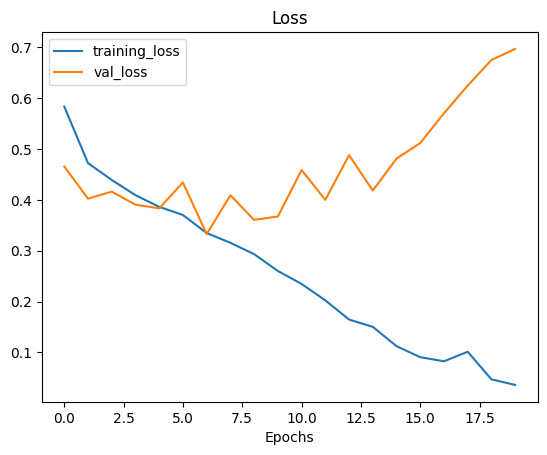

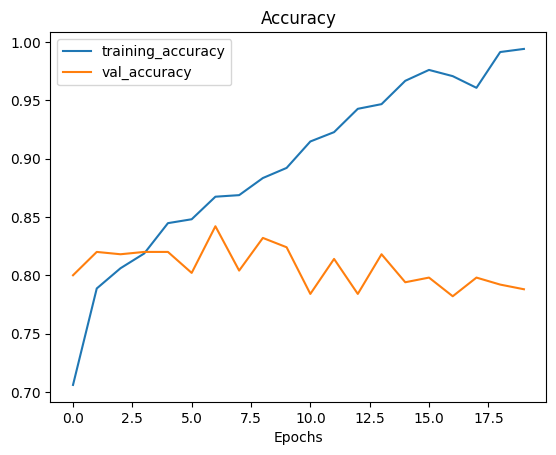

In [22]:
plot_loss_curves(history_5)

In [23]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [25]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

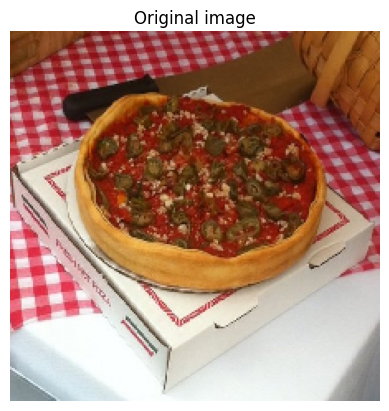

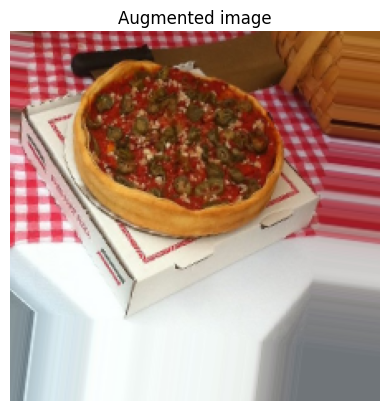

In [26]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [31]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=20,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/20
47/47 [==============================] - 23s 453ms/step - loss: 0.8459 - accuracy: 0.5547 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 2/20
47/47 [==============================] - 22s 462ms/step - loss: 0.7009 - accuracy: 0.4960 - val_loss: 0.6834 - val_accuracy: 0.5020
Epoch 3/20
47/47 [==============================] - 22s 479ms/step - loss: 0.6866 - accuracy: 0.5413 - val_loss: 0.6582 - val_accuracy: 0.6840
Epoch 4/20
47/47 [==============================] - 23s 498ms/step - loss: 0.6690 - accuracy: 0.6347 - val_loss: 0.5966 - val_accuracy: 0.7980
Epoch 5/20
47/47 [==============================] - 22s 471ms/step - loss: 0.6076 - accuracy: 0.6933 - val_loss: 0.5256 - val_accuracy: 0.7760
Epoch 6/20
47/47 [==============================] - 21s 450ms/step - loss: 0.5724 - accuracy: 0.7287 - val_loss: 0.6048 - val_accuracy: 0.6640
Epoch 7/20
47/47 [==============================] - 21s 458ms/step - loss: 0.6425 - accuracy: 0.6540 - val_loss: 0.6225 - val_accuracy: 0.6600

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 11)      308       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 11)      1100      
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 11)      1100      
                                                                 
 flatten (Flatten)           (None, 522764)            0         
                                                                 
 dense (Dense)               (None, 1)                 522765    
                                                                 
Total params: 525273 (2.00 MB)
Trainable params: 525273 (2.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
